# Model training for 100 top differential expressed genes

## Data load

In [39]:
# Constantes
TEST_SIZE = 0.2
SEED = 42

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [41]:
df = pd.read_csv('../data/interim/feature_selection/expr_top100_genes.csv', index_col=0)

df.dropna(inplace=True)
df

,MMP11,IL6ST,UBE2C,CBX2,TOP2A,TYMS,CDC20,KIF20A,ATAD1,CDCA5,...,ARMCX4,BIN1,RIPK1,DNAJC21,ST6GAL1,CCPG1,MAFF,relapse,grado_histologico,cohorte
CM.1.0001.1,4.385227,6.889767,4.530420,3.925704,5.028697,4.659949,5.060554,4.178063,5.586954,4.555791,...,3.753144,5.742826,5.252085,4.519822,10.611094,6.730461,4.167556,0,5.0,cohorte_0
CM.1.0002.1,4.698961,6.024845,4.297002,3.777947,4.202746,4.344799,4.392308,4.056100,4.800408,4.128915,...,4.180163,5.506278,4.929622,4.458633,8.191036,6.451659,3.857076,1,2.0,cohorte_0
CM.1.0003.1,4.045273,5.207633,4.511256,3.825914,4.587139,4.555352,4.488274,4.101552,4.421381,4.300825,...,3.496156,5.149198,4.954034,4.161368,5.750708,5.601301,4.573081,1,3.0,cohorte_0
CM.1.0004.1,4.046926,7.050562,4.213596,3.855243,4.239224,4.298624,4.281788,3.898204,4.435055,4.128915,...,3.954004,5.825187,4.960348,4.231948,6.275949,5.600240,4.341300,1,3.0,cohorte_0
CM.1.0005.1,4.306136,7.576777,4.387627,3.908079,4.457875,4.618209,4.954427,4.195356,4.823265,4.524443,...,3.949428,5.971847,5.163554,4.421923,7.627327,5.864021,5.597706,1,2.0,cohorte_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1817994,3.857007,10.615706,4.181359,4.058865,4.362413,4.293035,4.375278,3.953494,5.665933,4.187080,...,5.341012,6.348734,5.785533,5.101641,9.368450,7.976505,6.384352,0,2.0,cohorte_9
GSM1817995,4.341285,10.010202,3.611404,3.973203,3.821656,4.128264,3.945125,3.710115,4.707421,3.723270,...,3.245717,5.731608,5.649566,4.847576,10.919747,7.173663,6.313346,0,2.0,cohorte_9
GSM1817997,4.017681,8.996283,5.122002,4.067418,5.168808,4.696195,4.765945,4.322717,5.914065,4.769918,...,5.343128,5.417531,5.063495,4.974125,8.018824,8.524461,5.637115,0,2.0,cohorte_9
GSM1817998,4.024878,8.782608,4.655726,4.091150,4.965370,4.377642,4.627919,4.327359,6.207230,4.603415,...,3.946940,6.215959,5.058203,4.738887,7.034216,8.188600,6.847155,0,2.0,cohorte_9


## Identifying target from features

In this case, our target is `relapse` and the features are the levels of expression and `grado_histologico`.

I won't consider cohorte as relevant.

In [42]:
df.drop(columns=["cohorte"], inplace=True)

y = df["relapse"].copy()
X = df.drop(columns=["relapse"]).copy()

**Features:**

In [43]:
X

,MMP11,IL6ST,UBE2C,CBX2,TOP2A,TYMS,CDC20,KIF20A,ATAD1,CDCA5,...,AOX1,TYW1,ARMCX4,BIN1,RIPK1,DNAJC21,ST6GAL1,CCPG1,MAFF,grado_histologico
CM.1.0001.1,4.385227,6.889767,4.530420,3.925704,5.028697,4.659949,5.060554,4.178063,5.586954,4.555791,...,4.204105,5.092349,3.753144,5.742826,5.252085,4.519822,10.611094,6.730461,4.167556,5.0
CM.1.0002.1,4.698961,6.024845,4.297002,3.777947,4.202746,4.344799,4.392308,4.056100,4.800408,4.128915,...,4.212429,4.653204,4.180163,5.506278,4.929622,4.458633,8.191036,6.451659,3.857076,2.0
CM.1.0003.1,4.045273,5.207633,4.511256,3.825914,4.587139,4.555352,4.488274,4.101552,4.421381,4.300825,...,3.806822,4.649078,3.496156,5.149198,4.954034,4.161368,5.750708,5.601301,4.573081,3.0
CM.1.0004.1,4.046926,7.050562,4.213596,3.855243,4.239224,4.298624,4.281788,3.898204,4.435055,4.128915,...,4.539428,4.710409,3.954004,5.825187,4.960348,4.231948,6.275949,5.600240,4.341300,3.0
CM.1.0005.1,4.306136,7.576777,4.387627,3.908079,4.457875,4.618209,4.954427,4.195356,4.823265,4.524443,...,4.442333,4.898728,3.949428,5.971847,5.163554,4.421923,7.627327,5.864021,5.597706,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1817994,3.857007,10.615706,4.181359,4.058865,4.362413,4.293035,4.375278,3.953494,5.665933,4.187080,...,4.576548,5.179038,5.341012,6.348734,5.785533,5.101641,9.368450,7.976505,6.384352,2.0
GSM1817995,4.341285,10.010202,3.611404,3.973203,3.821656,4.128264,3.945125,3.710115,4.707421,3.723270,...,4.928745,4.843530,3.245717,5.731608,5.649566,4.847576,10.919747,7.173663,6.313346,2.0
GSM1817997,4.017681,8.996283,5.122002,4.067418,5.168808,4.696195,4.765945,4.322717,5.914065,4.769918,...,4.020775,5.040332,5.343128,5.417531,5.063495,4.974125,8.018824,8.524461,5.637115,2.0
GSM1817998,4.024878,8.782608,4.655726,4.091150,4.965370,4.377642,4.627919,4.327359,6.207230,4.603415,...,3.923764,5.154236,3.946940,6.215959,5.058203,4.738887,7.034216,8.188600,6.847155,2.0


**Target:**

In [44]:
y

CM.1.0001.1    0
CM.1.0002.1    1
CM.1.0003.1    1
CM.1.0004.1    1
CM.1.0005.1    1
              ..
GSM1817994     0
GSM1817995     0
GSM1817997     0
GSM1817998     0
GSM1817999     1
Name: relapse, Length: 191, dtype: int64

## Data preparation

Here there is a decission to make, if working with `grado_histologico` as categorical or numerical. And when treating it as categorical if it ordinal or not.

### Gleason as numeric

In [45]:
numeric_features = [col for col in X.columns if col != "grado_histologico"]
numeric_transformer = StandardScaler()

preprocessor_numeric = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features + ["grado_histologico"])
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train_num = preprocessor_numeric.fit_transform(X_train)
X_test_num = preprocessor_numeric.transform(X_test)

joblib.dump(preprocessor_numeric, "../models/preprocessor/preprocessor_numeric.joblib")


['../models/preprocessor/preprocessor_numeric.joblib']

### Gleason as categorical

#### One-hot (unordered)

In [46]:
categorical_features = ["grado_histologico"]
preprocessor_cat = ColumnTransformer([
    ("num", StandardScaler(), [col for col in X.columns if col != "grado_histologico"]),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
])
X_train_cat = preprocessor_cat.fit_transform(X_train)
X_test_cat = preprocessor_cat.transform(X_test)

joblib.dump(preprocessor_cat, "../models/preprocessor/preprocessor_cat.joblib")


['../models/preprocessor/preprocessor_cat.joblib']

In [47]:
X_train_cat_df = pd.DataFrame(X_train_cat)
X_test_cat_df = pd.DataFrame(X_test_cat)

print("Train shape:", X_train_cat_df.shape)
print("Test shape:", X_test_cat_df.shape)

Train shape: (152, 104)
Test shape: (39, 104)


### Gleason as ordinal

In [48]:
ordinal_encoder = OrdinalEncoder(categories=[sorted(X["grado_histologico"].unique())])
X_train_ord = X_train.copy()
X_test_ord = X_test.copy()

X_train_ord["grado_histologico"] = ordinal_encoder.fit_transform(X_train[["grado_histologico"]])
X_test_ord["grado_histologico"] = ordinal_encoder.transform(X_test[["grado_histologico"]])

preprocessor_ord = ColumnTransformer([
    ("num", StandardScaler(), [col for col in X.columns if col != "grado_histologico"] + ["grado_histologico"])
])
X_train_ord_scaled = preprocessor_ord.fit_transform(X_train_ord)
X_test_ord_scaled = preprocessor_ord.transform(X_test_ord)

joblib.dump(ordinal_encoder, "../models/preprocessor/ordinal_encoder.joblib")
joblib.dump(preprocessor_ord, "../models/preprocessor/preprocessor_ord.joblib")

['../models/preprocessor/preprocessor_ord.joblib']

In [86]:
print("Shapes:")
print("Numeric:", X_train_num.shape)
print("Categorical:", X_train_cat.shape)
print("Ordinal:", X_train_ord_scaled.shape)

Shapes:
Numeric: (152, 101)
Categorical: (152, 104)
Ordinal: (152, 101)


In [87]:
X_train_ord_scaled

array([[-1.39149692,  1.04412673, -0.63946147, ...,  1.30686342,
         0.4948827 , -0.37357488],
       [-0.88729678, -1.42747178, -0.15949775, ..., -0.90644012,
        -1.11319666, -1.33600509],
       [-0.41469425, -0.7328904 , -0.12185837, ..., -0.37574496,
        -0.85672314, -0.37357488],
       ...,
       [-0.21822375, -0.88279437,  0.13730246, ..., -0.7765769 ,
        -0.85475764,  1.55128553],
       [ 0.47447743,  1.20517024, -0.05600736, ..., -0.54858637,
        -0.0619178 ,  0.58885532],
       [-0.69980851, -0.34779035,  0.80719468, ..., -0.65750572,
        -0.45911014, -0.37357488]], shape=(152, 101))

In [88]:
sets_de_datos = {
    "Numerico" : {
        "X_train": X_train_num,
        "X_test": X_test_num,
        "y_train": y_train,
        "y_test": y_test
    },
    "Categorico": {
        "X_train": X_train_cat,
        "X_test": X_test_cat,
        "y_train": y_train,
        "y_test": y_test
    },
    "Ordinal": {
        "X_train": X_train_ord_scaled,
        "X_test": X_test_ord_scaled,
        "y_train": y_train,
        "y_test": y_test
    }
}

## Model Trainig

Dataset already prepared:
- Scaling applied to numeric features (gene expression + ordinal Gleason if used).
- Categorical encoding already done for Gleason (ordinal or one-hot).
- Top 100 most differential genes selected with limma.

Models will consume this ready-to-use data:
- Random Forest, XGBoost, SVM.

Cross-validation & evaluation:
- StratifiedKFold to maintain relapse class balance.
- GridSearchCV for hyperparameter tuning.
- Metrics: ROC AUC, Precision, Recall, F1.

Links:
- [SKlearn GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [Linear regression(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Para hacer la búsqueda con GridSearchCV
param_grid = {
    "n_estimators": [100, 300, 500], # es cuantos árboles, los tome de 200 en 200
    "max_depth": [3, 5, 7, None], # la profundidad máxima del árbol
    "min_samples_split": [2, 5, 10], # el mínimo de muestras para hacer un split
    "min_samples_leaf": [1, 2, 4], # el mínimo de muestras en una hoja
    "max_features": ["sqrt", "log2", None] # el número de características a considerar al buscar la mejor división
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
results = {}

for nombre, data in sets_de_datos.items():
    print(f"\n=== Running GridSearch for {nombre} dataset ===")

    rf = RandomForestClassifier(random_state=SEED)
    grid = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=skf,
        n_jobs=-1, # todos los nucleos
        verbose=1 # un poco de progreso pero no tanto
    )
    
    grid.fit(data["X_train"], data["y_train"])
    
    print(f"Best params for {nombre}: {grid.best_params_}")
    print(f"Best CV AUC for {nombre}: {grid.best_score_:.4f}")
    
    results[nombre] = grid


=== Running GridSearch for Numerico dataset ===
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params for Numerico: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV AUC for Numerico: 0.8242

=== Running GridSearch for Categorico dataset ===
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params for Categorico: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV AUC for Categorico: 0.8189

=== Running GridSearch for Ordinal dataset ===
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params for Ordinal: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV AUC for Ordinal: 0.8242


Tratando gleason como ordinal o numerico parece tener el mismo AUC, debe ser por que solo se desplaza la escala.

In [90]:
results

{'Numerico': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
              param_grid={'max_depth': [3, 5, 7, None],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 300, 500]},
              scoring='roc_auc', verbose=1),
 'Categorico': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
              param_grid={'max_depth': [3, 5, 7, None],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100, 300, 500]},
              scoring='roc_

In [ ]:


for nombre, grid in results.items():
    best_model = grid.best_estimator_
    filename = f"../models/rf_best_{nombre.lower()}.joblib"
    joblib.dump(best_model, filename)
    print(f"Saved {nombre} best model with params {grid.best_params_} to {filename}")

Saved Numerico best model with params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} to ../models/rf_best_numerico.joblib
Saved Categorico best model with params {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100} to ../models/rf_best_categorico.joblib
Saved Ordinal best model with params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} to ../models/rf_best_ordinal.joblib


### SVM

[SVM Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

- C: penalización por clasificación erronea
- kernel: Es la función de kernel que se utiliza. Hay lineales y no lineales.
- gamma: escalado en kernel no lineales.

In [92]:
from sklearn.svm import SVC

param_grid_svc = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

svm_results = {}

for nombre, data in sets_de_datos.items():
    print(f"\n=== Running GridSearch for {nombre} dataset ===")

    svm_model = SVC(probability=True, random_state=SEED)

    grid = GridSearchCV(
        estimator=svm_model,
        param_grid=param_grid_svc,
        scoring="roc_auc",
        cv=skf,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(data["X_train"], data["y_train"])

    print(f"Best params for {nombre}: {grid.best_params_}")
    print(f"Best CV AUC for {nombre}: {grid.best_score_:.4f}")

    svm_results[nombre] = grid

    joblib.dump(grid.best_estimator_, f"../models/svm_best_{nombre}.joblib")


=== Running GridSearch for Numerico dataset ===
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Numerico: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best CV AUC for Numerico: 0.8364

=== Running GridSearch for Categorico dataset ===
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Categorico: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best CV AUC for Categorico: 0.8337

=== Running GridSearch for Ordinal dataset ===
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params for Ordinal: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best CV AUC for Ordinal: 0.8364


In [93]:
svm_results

{'Numerico': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=SVC(probability=True, random_state=42), n_jobs=-1,
              param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly']},
              scoring='roc_auc', verbose=1),
 'Categorico': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=SVC(probability=True, random_state=42), n_jobs=-1,
              param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly']},
              scoring='roc_auc', verbose=1),
 'Ordinal': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=SVC(probability=True, random_state=42), n_jobs=-1,
              param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly']},
      

### XGBoost

- n_estimators: Número de árboles
- max_depth: Profundidad máxima de los árboles
- learning_rate: Tasa de aprendizaje. Escala cuánto contribuye cada árbol nuevo al modelo final.
- subsample: Fracción de muestras para cada árbol. Controla el muestreo aleatorio de filas para entrenar cada árbol.
- colsample_bytree: Fracción de características para cada árbol. Controla el muestreo aleatorio de columnas por árbol. Evita que ciertos features dominen todos los árboles, mejorando la generalización.

In [94]:
from xgboost import XGBClassifier

param_grid_xgb = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}


xgb_results = {}

for nombre, data in sets_de_datos.items():
    print(f"\n=== Running GridSearch for {nombre} dataset ===")
    
    xgb_model = XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        random_state=SEED
    )
    
    grid = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid_xgb,
        scoring="roc_auc",
        cv=skf,
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(data["X_train"], data["y_train"])
    
    print(f"Best params for {nombre}: {grid.best_params_}")
    print(f"Best CV AUC for {nombre}: {grid.best_score_:.4f}")
    
    xgb_results[nombre] = grid
    joblib.dump(grid.best_estimator_, f"../models/xgb_best_{nombre}.joblib")


=== Running GridSearch for Numerico dataset ===
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params for Numerico: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best CV AUC for Numerico: 0.8209

=== Running GridSearch for Categorico dataset ===
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params for Categorico: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best CV AUC for Categorico: 0.8197

=== Running GridSearch for Ordinal dataset ===
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params for Ordinal: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best CV AUC for Ordinal: 0.8209


### Multi Layer perceptron

- [Referencia](https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b)

In [95]:
from sklearn.neural_network import MLPClassifier

param_grid_mlp = {
    "hidden_layer_sizes": [(30,), (50,), (80,), (90,), (100,), (50,50)], # pruebo una capa, con 50 y 100 y dos capas con 50 y 50. Tengo 200 parametros por eso no pruebo cosas tan chicas.
    "activation": ["relu", "tanh"], # funciones de activacion conocidas
    "solver": ["adam", "sgd"], # optimizadores
    "alpha": [0.0001, 0.001, 0.01, 0.05], # regularización L2
    "learning_rate": ["constant", "adaptive"] # tasa de aprendizaje
}

mlp_results = {}

for nombre, data in sets_de_datos.items():
    print(f"\n=== Running GridSearch for {nombre} dataset ===")

    mlp = MLPClassifier(max_iter=10000, random_state=SEED)

    grid = GridSearchCV(
        estimator=mlp,
        param_grid=param_grid_mlp,
        scoring="roc_auc",
        cv=skf,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(data["X_train"], data["y_train"])

    print(f"Best params for {nombre}: {grid.best_params_}")
    print(f"Best CV AUC for {nombre}: {grid.best_score_:.4f}")

    mlp_results[nombre] = grid

    # Guardamos el modelo con joblib
    joblib.dump(grid.best_estimator_, f"../models/mlp_best_{nombre}.joblib")



=== Running GridSearch for Numerico dataset ===
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best params for Numerico: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best CV AUC for Numerico: 0.8502

=== Running GridSearch for Categorico dataset ===
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best params for Categorico: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (80,), 'learning_rate': 'constant', 'solver': 'adam'}
Best CV AUC for Categorico: 0.8400

=== Running GridSearch for Ordinal dataset ===
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best params for Ordinal: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best CV AUC for Ordinal: 0.8502


## Exploración de resultados

In [101]:
rows = []
model_dict = {
    "Random Forest": results,
    "SVM": svm_results,
    "Gradient Boosting": xgb_results,
    "Perceptron": mlp_results
}

for model_name, model_results in model_dict.items():
    for dataset_name, grid in model_results.items():
        best_score = grid.best_score_ if hasattr(grid, "best_score_") else None
        rows.append({
            "Model": model_name,
            "Dataset": dataset_name,
            "Best CV AUC": best_score
        })

df_results = pd.DataFrame(rows)


In [102]:
df_results

,Model,Dataset,Best CV AUC
0,Random Forest,Numerico,0.824163
1,Random Forest,Categorico,0.818900
2,Random Forest,Ordinal,0.824163
3,SVM,Numerico,0.836443
4,SVM,Categorico,0.833652
5,SVM,Ordinal,0.836443
6,Gradient Boosting,Numerico,0.820893
7,Gradient Boosting,Categorico,0.819697
8,Gradient Boosting,Ordinal,0.820893
9,Perceptron,Numerico,0.850239


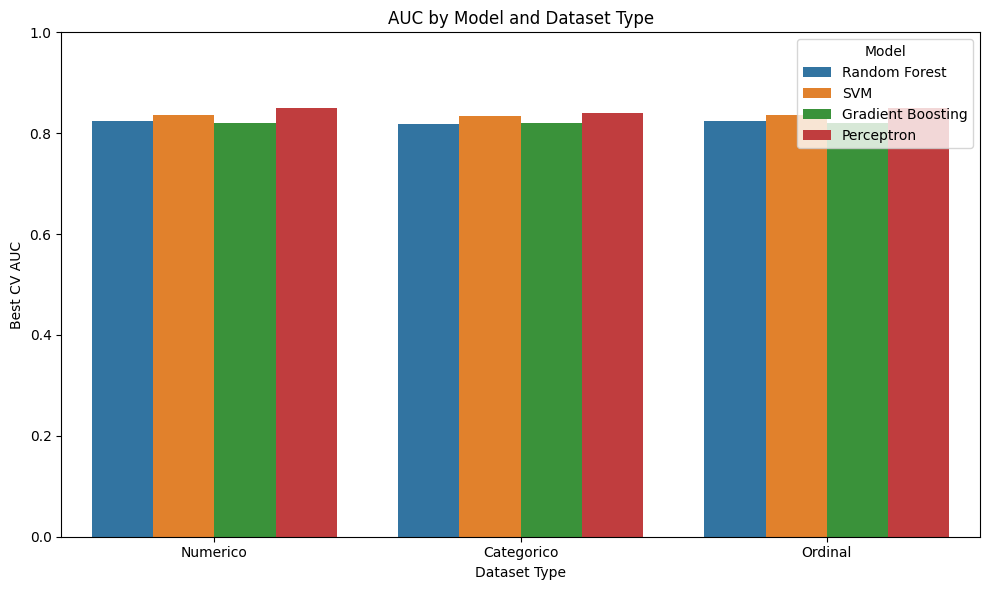

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_results, x="Dataset", y="Best CV AUC", hue="Model")
plt.title("AUC by Model and Dataset Type")
plt.ylim(0, 1)
plt.ylabel("Best CV AUC")
plt.xlabel("Dataset Type")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score

all_results = []

for model_name, model_dict in {
    "RandomForest": results,
    "SVM": svm_results,
    "GradientBoosting": xgb_results,
    "MLP": mlp_results
}.items():
    for dataset_name, grid in model_dict.items():
        best_model = grid.best_estimator_
        X_test = sets_de_datos[dataset_name]["X_test"]
        y_test = sets_de_datos[dataset_name]["y_test"]

        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test) # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

        auc = roc_auc_score(y_test, y_prob)
        f1 = f1_score(y_test, y_pred)

        all_results.append({
            "Model": model_name,
            "Dataset": dataset_name,
            "AUC": auc,
            "F1": f1
        })

df_results = pd.DataFrame(all_results)

df_results

,Model,Dataset,AUC,F1
0,RandomForest,Numerico,0.861111,0.615385
1,RandomForest,Categorico,0.841667,0.615385
2,RandomForest,Ordinal,0.861111,0.615385
3,SVM,Numerico,0.886111,0.333333
4,SVM,Categorico,0.880556,0.333333
5,SVM,Ordinal,0.886111,0.333333
6,GradientBoosting,Numerico,0.866667,0.750000
7,GradientBoosting,Categorico,0.816667,0.620690
8,GradientBoosting,Ordinal,0.866667,0.750000
9,MLP,Numerico,0.850000,0.666667


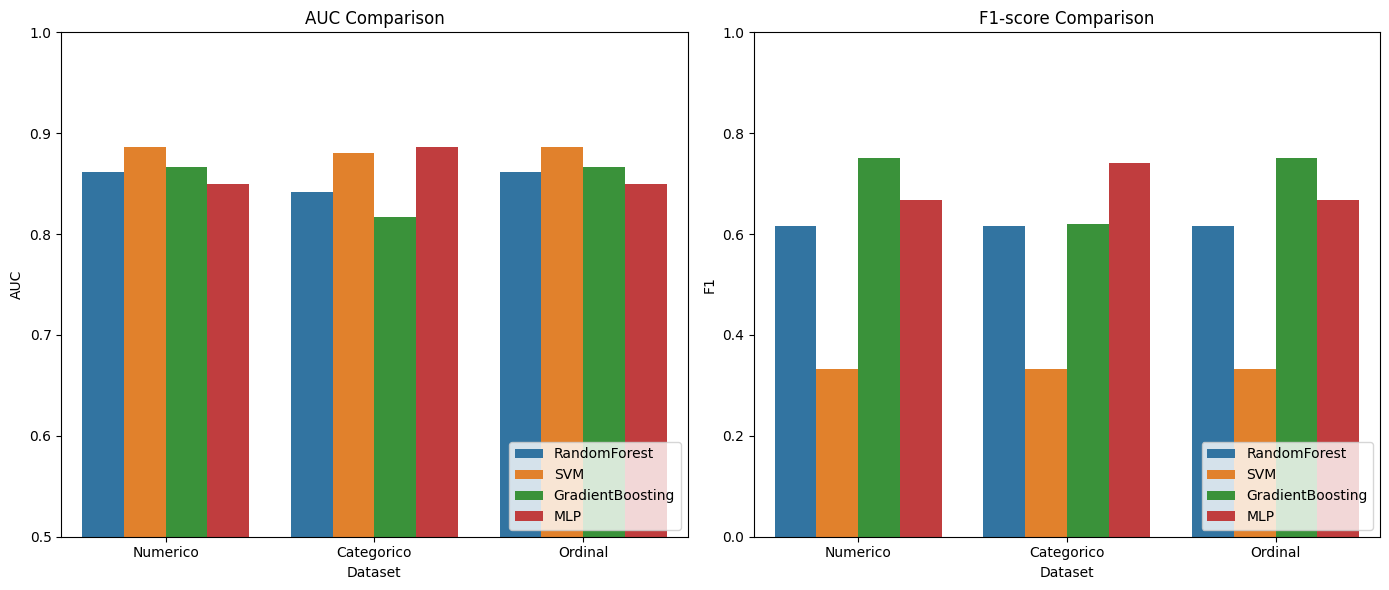

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="Dataset", y="AUC", hue="Model", data=df_results, ax=ax[0])
ax[0].set_title("AUC Comparison")
ax[0].set_ylim(0.5, 1)
ax[0].legend(loc='lower right')

sns.barplot(x="Dataset", y="F1", hue="Model", data=df_results, ax=ax[1])
ax[1].set_title("F1-score Comparison")
ax[1].set_ylim(0, 1)
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


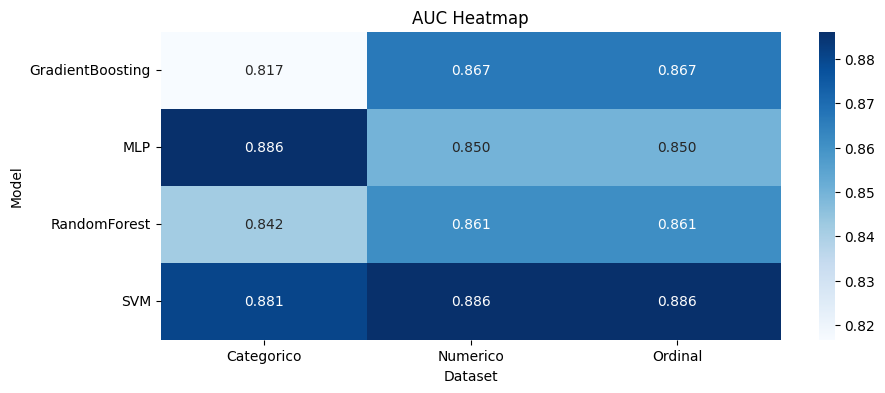

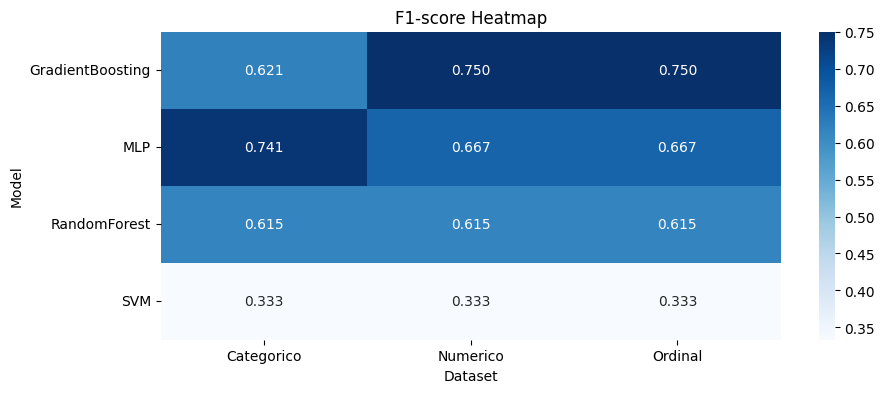

In [115]:
auc_matrix = df_results.pivot(index="Model", columns="Dataset", values="AUC")
f1_matrix = df_results.pivot(index="Model", columns="Dataset", values="F1")

sns.color_palette("Blues", as_cmap=True)

plt.figure(figsize=(10, 4))
sns.heatmap(auc_matrix, annot=True, fmt=".3f", cmap="Blues")
plt.title("AUC Heatmap")
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(f1_matrix, annot=True, fmt=".3f", cmap="Blues")
plt.title("F1-score Heatmap")
plt.yticks(rotation=0)
plt.show()

Busqué ver más métricas que solo AUC, por ello complementé el análisis con F1 y ví que SVM tiene serios problemas con ella